Image and video processing

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import imageio
import matplotlib.pyplot as plt
import numpy as np
#import pylab

There are 290 frames.


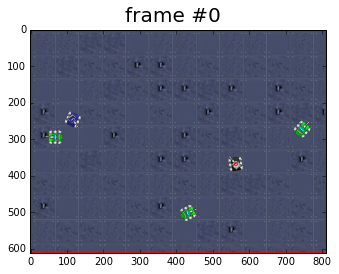

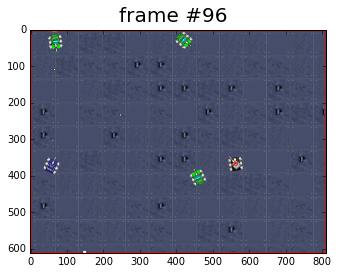

In [13]:
# see http://stackoverflow.com/questions/29718238/how-to-read-mp4-video-to-be-processed-by-scikit-image

filename = 'tanks.ogg'
vid = imageio.get_reader(filename,  'ffmpeg')
n_frames = vid.get_length()
print 'There are %d frames.'%n_frames

# frame numbers to show
nums = [0, n_frames/3]
for num in nums:
    image = vid.get_data(num)
    fig = plt.figure()
    fig.suptitle('frame #{}'.format(num), fontsize=20)
    plt.imshow(image)


In [3]:
image.shape

(612, 812, 3)

Use ipython widgets to interactively show frames

In [34]:
def stack_frames(vid_reader):
    """Take in a video reader, read all the frames and stack them into a list."""
    n = vid_reader.get_length()
    frames = []
    for frame in vid_reader:
        frames.append(frame)
    return frames
    
def show_frame(stack, frame_ind=0):
    #img = vid_reader.get_data(frame_ind)
    img = stack[frame_ind]
    plt.imshow(img)
    plt.title('frame #%d'%frame_ind, fontsize=20)

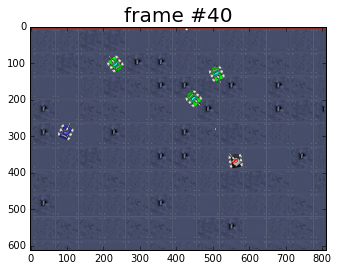

In [35]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display
import ipywidgets as widgets

# This may take some memory
frames = stack_frames(vid)

vs = interactive(show_frame, stack=fixed(frames), frame_ind=(0, n_frames-1));
display(vs)